# Cryptocurrency Covariance Analysis

In [1]:
import os, sys
import pathlib
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm as cm
from pylab import rcParams
import scipy.cluster.hierarchy as hac
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import fcluster

In [2]:
feature_type = 'return_pcnt'

In [3]:
feature_list = ['symbol','pr_count','issues_count','commit_add_sum','commit_del_sum','commit_count','star_count','close','high','low','open','usd_market_cap','usd_volume']

In [4]:
rcParams['figure.figsize'] = 15, 12

### Load Currency Price Histories

In [5]:
def show_correlation_matrix(df):
    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    cmap = cm.get_cmap('jet', 30)
    cax = ax1.imshow(df, interpolation="nearest", cmap=cmap)
    ax1.grid(True)
    plt.title('Coin Correlation Matrix')
    labels=[x.split('_',1)[0] for x in df.columns.values]
    ax1.set_xticks(np.arange(len(labels)))
    ax1.set_xticklabels(labels,fontsize=10, rotation=90)
    ax1.set_yticks(np.arange(len(labels)))
    ax1.set_yticklabels(labels,fontsize=10)
    # Add colorbar, make sure to specify tick locations to match desired ticklabels
    fig.colorbar(cax, ticks=range(-1,10))
    fig.set_size_inches(18.5, 18.5)
    plt.show()

In [6]:
def fancy_dendrogram(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)

    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title('Hierarchical Clustering Dendrogram (truncated)')
        plt.xlabel('sample index or (cluster size)')
        plt.ylabel('distance')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata

In [7]:
def generate_clusters(timeSeries):
    timeSeries = timeSeries.replace([np.inf, -np.inf, np.nan], 0.001)

    z_euclidean = hac.linkage(timeSeries, method='ward', metric='euclidean'),"Euclidean"
#     z_minkowski = hac.linkage(timeSeries, method='ward', metric='minkowski'),"Minowski"
#     z_cityblock = hac.linkage(timeSeries, method='ward', metric='cityblock'),"Cityblock"
#     z_cosine = hac.linkage(timeSeries, method='ward', metric='cosine'),"Cosine"
#     z_correlation = hac.linkage(timeSeries, method='ward', metric='correlation'),"Correlation"

    p = 12
    max_d = 50
    
    for z, name in [z_euclidean]:
                                #ValueError: Method 'ward' requires the distance metric to be Euclidean
        print(name, "/", "Ward")
        plt.title('Hierarchical Clustering Dendrogram (truncated)')
        plt.xlabel('coin')
        plt.ylabel('distance')
        fancy_dendrogram(
            z,
            p=p,
            leaf_rotation=90.,
            leaf_font_size=12.,
            show_contracted=True,
            max_d=max_d,
            annotate_above=1,
            color_threshold=8,
            labels=[x.split('_',1)[0] for x in timeSeries.columns.values]
        )
        plt.show()

In [8]:
dfs = []
hist_symbol = []
columns = ['close','open','high','low']

for path in pathlib.Path("CoinCSVs").iterdir():
    filename = path.name
    symbol = filename.split('.')[0]
    sdf = pd.read_csv(path,
                          usecols=[1,2,3,4,],
                          header=0,
                          names=[('{}_'+feature_type).format(symbol) for feature_type in columns])
    dfs.append(sdf)
    hist_symbol.append(symbol)
hist_symbol = set(hist_symbol)

In [9]:
for df in dfs:
    symbol = df.columns.values[0].split("_",1)[0]
    df[symbol+'_return_pcnt'] = (df[symbol+"_close"] - df[symbol+"_open"]) / df[symbol+"_close"]
    df[symbol+'_volatility_pcnt'] = (df[symbol+"_high"] - df[symbol+"_low"]) / ((df[symbol+"_high"] + df[symbol+"_low"]) / 2)

In [10]:
feature_df = pd.concat([x[x.columns.values[0].split("_",1)[0]+'_'+feature_type] for x in dfs], axis=1)
feature_df.describe()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/lib/function_base.py:3768: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


,DRGN_return_pcnt,BCH_return_pcnt,BTC_return_pcnt,XRB_return_pcnt,RHOC_return_pcnt,SNT_return_pcnt,XRP_return_pcnt,BTG_return_pcnt,BCN_return_pcnt,REP_return_pcnt,...,QTUM_return_pcnt,ARK_return_pcnt,ZEC_return_pcnt,DASH_return_pcnt,DCR_return_pcnt,FCT_return_pcnt,ADA_return_pcnt,LTC_return_pcnt,ZRX_return_pcnt,DOGE_return_pcnt
count,6.000000,80.000000,254.000000,130.000000,88.000000,218.000000,139.000000,94.000000,78.000000,169.000000,...,158.000000,34.000000,203.000000,189.000000,139.000000,93.000000,131.000000,83.000000,113.000000,54.000000
mean,-inf,-inf,-inf,-inf,-0.049242,-inf,-inf,-inf,-inf,-inf,...,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf
std,NaN,NaN,NaN,NaN,0.260365,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,-inf,-inf,-inf,-inf,-2.000000,-inf,-inf,-inf,-inf,-inf,...,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf
25%,-inf,-inf,-0.750000,-inf,0.000000,-2.333333,-1.000000,-inf,-inf,0.000000,...,-inf,-inf,-inf,-1.000000,-0.333333,0.000000,-0.285714,-inf,-0.500000,-inf
50%,-inf,-inf,-0.400000,-1.333333,0.000000,-1.200000,0.000000,-3.000000,-inf,0.000000,...,-0.416667,0.000000,-4.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,-0.625000
75%,0.000000,-1.000000,-0.166667,0.000000,0.000000,-0.566667,0.000000,-0.500000,-inf,0.000000,...,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [11]:
cov_df = feature_df.cov()
cov_df.describe()

,DRGN_return_pcnt,BCH_return_pcnt,BTC_return_pcnt,XRB_return_pcnt,RHOC_return_pcnt,SNT_return_pcnt,XRP_return_pcnt,BTG_return_pcnt,BCN_return_pcnt,REP_return_pcnt,...,QTUM_return_pcnt,ARK_return_pcnt,ZEC_return_pcnt,DASH_return_pcnt,DCR_return_pcnt,FCT_return_pcnt,ADA_return_pcnt,LTC_return_pcnt,ZRX_return_pcnt,DOGE_return_pcnt
count,11.0,32.000000,38.000000,36.000000,37.000000,38.000000,37.000000,35.000000,3.100000e+01,36.000000,...,37.000000,30.000000,37.000000,38.000000,38.000000,37.0,38.000000,35.000000,36.000000,33.000000
mean,0.0,0.014012,-0.019904,0.134213,-0.001687,0.159003,0.041440,0.066407,-6.517800e-02,-0.003512,...,0.021713,-0.007339,0.099866,0.031279,-0.001402,0.0,-0.014361,-0.034990,0.016664,0.013629
std,0.0,0.470255,0.117575,0.578311,0.066991,0.605307,0.115942,0.694035,1.804960e-01,0.014623,...,0.151636,0.033337,0.656100,0.075883,0.068062,0.0,0.095774,0.174123,0.085823,0.118350
min,0.0,-0.554661,-0.343043,-0.456037,-0.325758,-0.333084,-0.250000,-1.137959,-6.666667e-01,-0.048500,...,-0.207692,-0.127982,-1.500000,-0.078544,-0.310500,0.0,-0.344048,-0.666667,-0.173469,-0.291667
25%,0.0,-0.188079,-0.062572,-0.090103,-0.006858,-0.072845,-0.004225,-0.141816,-1.248377e-01,-0.007413,...,-0.029976,-0.004846,-0.135133,-0.004090,-0.020187,0.0,-0.036829,-0.087711,-0.014795,-0.029121
50%,0.0,-0.067282,-0.006634,0.000000,0.000000,-0.003411,0.007760,0.000000,-3.469447e-18,-0.002440,...,-0.003767,0.000000,0.000000,0.016754,0.000000,0.0,-0.016949,0.000000,0.000000,0.000000
75%,0.0,0.000000,0.008801,0.136740,0.000000,0.107484,0.082757,0.061832,2.148148e-02,0.000000,...,0.065620,0.000000,0.119081,0.049062,0.020641,0.0,0.000000,0.034659,0.020183,0.069924
max,0.0,2.264655,0.473316,2.976152,0.159140,2.988496,0.423269,2.620476,2.651515e-01,0.050000,...,0.575590,0.059868,2.620476,0.316964,0.165336,0.0,0.253376,0.335172,0.295770,0.365080


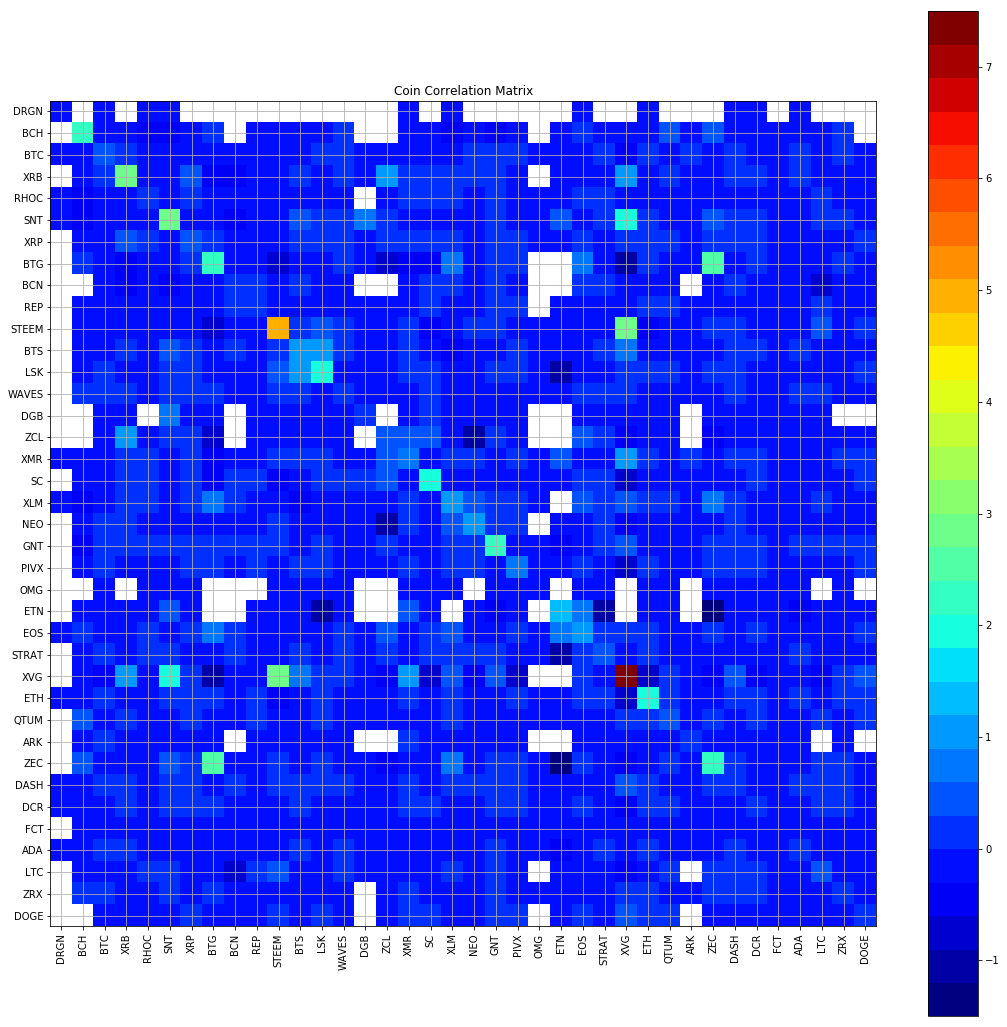

In [12]:
show_correlation_matrix(cov_df)

Euclidean / Ward


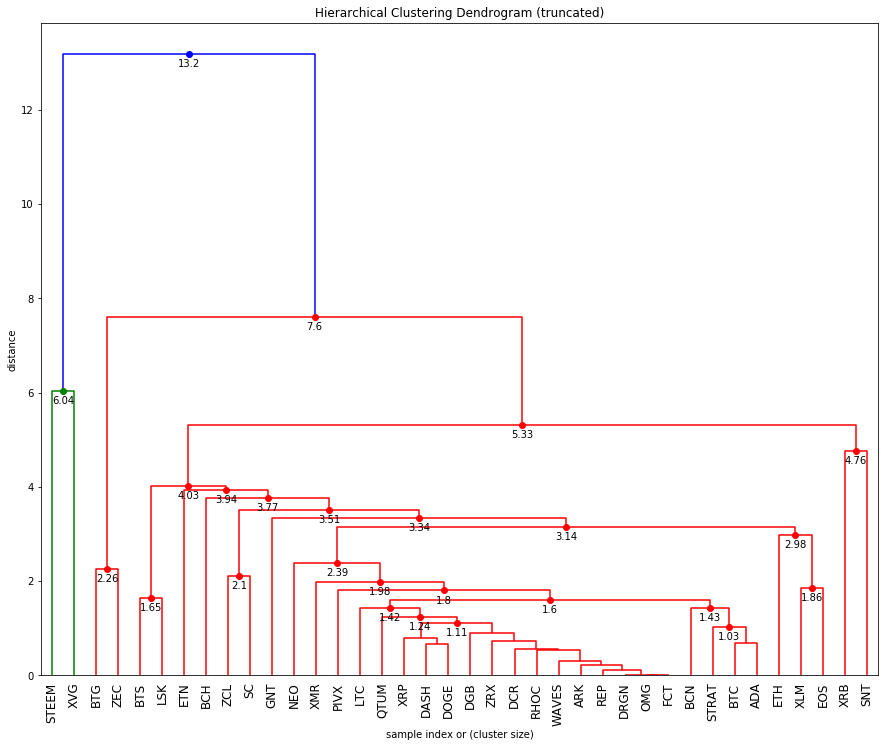

In [13]:
generate_clusters(cov_df)